In [1]:
from pathlib import Path
from brainlit.utils.Neuron_trace import NeuronTrace
from brainlit.algorithms.trace_analysis.fit_spline import GeometricGraph
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from scipy.interpolate import splev

/Users/thomasathey/Documents/mimlab/mouselight/docs_env/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
brainlit_path=Path.cwd().parent.parent.parent
swc=Path.joinpath(brainlit_path,'data','data_octree','consensus-swcs','2018-08-01_G-002_consensus.swc')
nt = NeuronTrace(path=str(swc))
df = nt.get_df()
neuron = GeometricGraph(df=df)


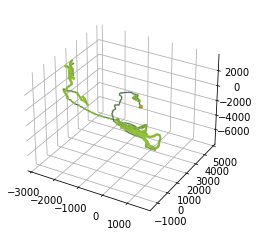

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
soma = np.array(neuron.nodes[neuron.root]["loc"])
spline_tree = neuron.fit_spline_tree_invariant()
for node in spline_tree.nodes:
    path = spline_tree.nodes[node]["path"]
    locs = np.zeros((len(path),3))
    for p,point in enumerate(path):
        locs[p,:] = neuron.nodes[point]["loc"]
    ax.scatter(locs[:,0], locs[:,1], locs[:,2], marker=".",edgecolor='yellowgreen',linewidths=1,c='mediumblue', s=8)
    ax.plot(locs[:,0], locs[:,1], locs[:,2], linestyle='-',color='midnightblue',linewidth=0.8)
ax.scatter(soma[0],soma[1],soma[2], c='darkorange', s=5)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.grid(True)


plt.show()

In [4]:
from brainlit.map_neurons.map_neurons import DiffeomorphismAction, transform_GeometricGraph

diff = DiffeomorphismAction()
neuron_tranformed = transform_GeometricGraph(neuron, diff)

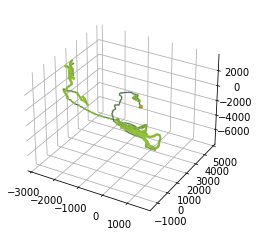

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
soma = np.array(neuron.nodes[neuron.root]["loc"])
spline_tree = neuron_tranformed.fit_spline_tree_invariant()
for node in spline_tree.nodes:
    path = spline_tree.nodes[node]["path"]
    locs = np.zeros((len(path),3))
    for p,point in enumerate(path):
        locs[p,:] = neuron_tranformed.nodes[point]["loc"]
    ax.scatter(locs[:,0], locs[:,1], locs[:,2], marker=".",edgecolor='yellowgreen',linewidths=1,c='mediumblue', s=8)
    ax.plot(locs[:,0], locs[:,1], locs[:,2], linestyle='-',color='midnightblue',linewidth=0.8)
ax.scatter(soma[0],soma[1],soma[2], c='darkorange', s=5)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.grid(True)


plt.show()